In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [48]:
#load train and test files
train = pd.read_csv('train_BRCpofr.csv')
test = pd.read_csv('test_koRSKBP.csv')

In [49]:
print(train.shape, test.shape)

(89392, 12) (59595, 11)


In [50]:
train

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [52]:
len(train[train.claim_amount == 0]) * 100/train.shape[0]

19.767988186862357

In [53]:
len(test[test.claim_amount == 0]) * 100/test.shape[0]

19.808708784293984

In [54]:
train[['claim_amount', 'cltv']].describe()

,claim_amount,cltv
count,89392.000000,89392.000000
mean,4351.502416,97952.828978
std,3262.359775,90613.814793
min,0.000000,24828.000000
25%,2406.000000,52836.000000
50%,4089.000000,66396.000000
75%,6094.000000,103440.000000
max,31894.000000,724068.000000


<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

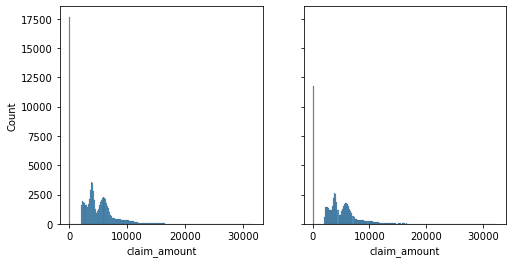

In [55]:
fig, axes = plt.subplots(1,2, figsize = (8,4), sharey = True)
sns.histplot(train.claim_amount, ax = axes[0])
sns.histplot(test.claim_amount , ax = axes[1])

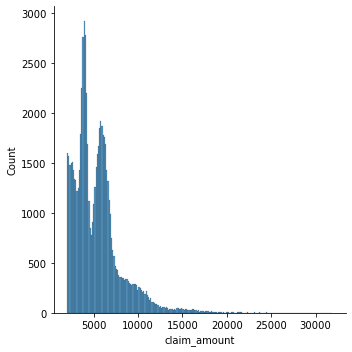

In [56]:
sns.displot(train[train['claim_amount'] >0]['claim_amount'])

<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

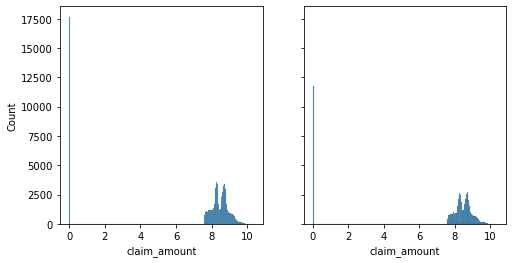

In [57]:
fig, axes = plt.subplots(1,2, figsize = (8,4), sharey = True)
sns.histplot(np.log(train.claim_amount + 1), ax = axes[0])
sns.histplot(np.log(test.claim_amount +1) , ax = axes[1])

<AxesSubplot:xlabel='claim_amount'>

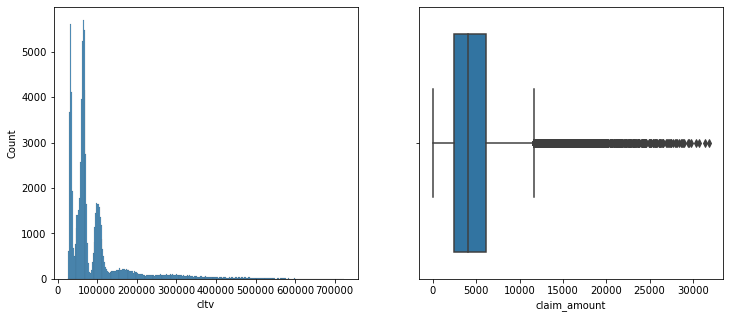

In [58]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
sns.histplot(train.cltv, ax = axes[0])
sns.boxplot(data = train, x= 'claim_amount', ax = axes[1])

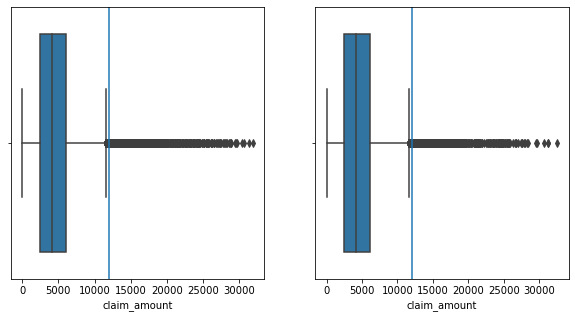

In [59]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(data = train, x = 'claim_amount', ax = axes[0])
axes[0].axvline(12000)
sns.boxplot(data = test, x = 'claim_amount', ax = axes[1])
plt.axvline(12000)

In [60]:
train.policy.unique()

array(['A', 'C', 'B'], dtype=object)

In [61]:
train.type_of_policy.unique()

array(['Platinum', 'Gold', 'Silver'], dtype=object)

In [62]:
train.nunique()

id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [63]:
train.vintage.unique()

array([5, 8, 7, 6, 1, 0, 3, 4, 2], dtype=int64)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [65]:
 for col in train.select_dtypes(['object']).columns:
        print(col, train[col].unique())

gender ['Male' 'Female']
area ['Urban' 'Rural']
qualification ['Bachelor' 'High School' 'Others']
income ['5L-10L' 'More than 10L' '2L-5L' '<=2L']
num_policies ['More than 1' '1']
policy ['A' 'C' 'B']
type_of_policy ['Platinum' 'Gold' 'Silver']


In [66]:
qualification_dict = {'Others': 0,'High School':1, 'Bachelor': 2}
income_dict = {'<=2L': 0,  '2L-5L':1, '5L-10L':2,  'More than 10L' :3 }
num_policies_dict =  {'1': 0,'More than 1': 1 }
type_of_policy_dict = { 'Silver': 0,  'Gold' : 1 , 'Platinum': 2}

In [67]:
train.columns

Index(['id', 'gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy',
       'cltv'],
      dtype='object')

In [68]:
def label_df(df):
    qualification_dict = {'Others': 0,'High School':1, 'Bachelor': 2}
    income_dict = {'<=2L': 0,  '2L-5L':1, '5L-10L':2,  'More than 10L' :3 }
    num_policies_dict =  {'1': 0,'More than 1': 1 }
    type_of_policy_dict = { 'Silver': 0,  'Gold' : 1 , 'Platinum': 2}
    
    df['qualification'] = df['qualification'].map(qualification_dict)
    df['income'] = df['income'].map(income_dict)
    df['num_policies'] = df['num_policies'].map(num_policies_dict)
    df['type_of_policy'] =  df['type_of_policy'].map(type_of_policy_dict)   
    
    return df

In [69]:
label_df(train)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,2,2,1,5,5790,1,A,2,64308
1,2,Male,Rural,1,2,0,8,5080,1,A,2,515400
2,3,Male,Urban,2,2,1,8,2599,1,A,2,64212
3,4,Female,Rural,1,2,0,7,0,1,A,2,97920
4,5,Male,Urban,1,3,1,6,3508,1,A,1,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,1,3,0,6,0,1,B,2,95736
89388,89389,Male,Urban,2,2,1,0,3897,1,A,2,67596
89389,89390,Female,Urban,2,2,0,4,3363,1,B,2,114120
89390,89391,Female,Rural,1,1,0,8,0,1,B,2,71772


In [70]:
label_df(test)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,1,2,0,6,2134,1,B,0
1,89394,Female,Urban,1,1,0,4,4102,1,A,2
2,89395,Male,Rural,1,2,1,7,2925,1,B,1
3,89396,Female,Rural,2,3,1,2,0,1,B,0
4,89397,Female,Urban,1,1,0,5,14059,1,B,0
...,...,...,...,...,...,...,...,...,...,...,...
59590,148983,Male,Rural,2,2,1,6,0,0,A,0
59591,148984,Male,Urban,1,2,0,6,0,0,C,1
59592,148985,Female,Urban,1,1,1,4,3323,1,B,2
59593,148986,Male,Rural,2,2,0,1,2886,1,A,0


In [71]:
train.claim_amount = np.log(train.claim_amount + 1)
train.cltv = np.log(train.cltv)
test.claim_amount = np.log(test.claim_amount + 1)

In [72]:
train = pd.get_dummies(train, drop_first = True)

In [73]:
test  = pd.get_dummies(test, drop_first = True)

In [74]:
train_features = train.drop(['id', 'cltv'], axis = 'columns')

In [75]:
train_target = train['cltv']

In [76]:
test_features = test.drop(['id'], axis = 'columns')

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
model_objects = [
    LinearRegression(),
    DecisionTreeRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    XGBRFRegressor(),
    Lasso(),
    Ridge(),
    KNeighborsRegressor(),
    LGBMRegressor()
]

In [80]:
model_name = [
    'LinearRegression',
    'DecisionTreeRegressor',
    'AdaBoostRegressor',
    'BaggingRegressor',
    'ExtraTreesRegressor',
    'GradientBoostingRegressor',
    'RandomForestRegressor',
    'XGBRegressor',
    'XGBRFRegressor',
    'Lasso',
    'Ridge',
    'KNeighborsRegressor',
    'LGBMRegressor'
]

In [81]:
model_eval = []

for instance,name in zip(model_objects,model_name):
    r2_score = cross_val_score(instance, train_features,train_target, cv = 5, scoring = 'r2').mean()
    neg_mean_squared_error = cross_val_score(instance, train_features, train_target, cv =5, 
                                            scoring = 'neg_mean_squared_error').mean()
    model_eval.append([name, r2_score, neg_mean_squared_error])
    instance.fit(train_features, train_target)
    test['cltv'] = np.exp(instance.predict(test_features))
    submission = test[['id', 'cltv']]
    submission.to_csv('submission_log_scaled_'+name+ '.csv', index = False)

In [82]:
model_scores = pd.DataFrame(model_eval, columns = ['model_name', 'r2_score', 'neg_mean_squared_error'])

In [83]:
model_scores.sort_values('r2_score')

,model_name,r2_score,neg_mean_squared_error
1,DecisionTreeRegressor,-0.353990,-0.571839
9,Lasso,-0.000050,-0.423486
4,ExtraTreesRegressor,0.047006,-0.404164
3,BaggingRegressor,0.172275,-0.349393
11,KNeighborsRegressor,0.184311,-0.345434
6,RandomForestRegressor,0.227167,-0.327139
2,AdaBoostRegressor,0.253661,-0.317312
0,LinearRegression,0.310896,-0.291821
10,Ridge,0.310896,-0.291821
7,XGBRegressor,0.312171,-0.291279
